In [91]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [93]:
### Import the Dataset
df = pd.read_csv(r"C:\Users\Zahid.Shaikh\100days\58\Mall_Customers.csv",header=0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
df.shape ### Checking Shape

(200, 5)

In [97]:
df.describe() ### Get information of the Dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [99]:
df.columns ### Checking Columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [101]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [103]:
df.isnull().sum() ### Checking Null Values in the Data

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [105]:
df1 = pd.DataFrame.copy(df)
df1.shape

(200, 5)

In [107]:
for i in df1.columns:
    print({i:df1[i].unique()}) ### Checking Unique values in each columns

{'CustomerID': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 17

In [109]:
### Finding numerical variables
colname_num = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(colname_num)))
print('The numerical variables are :', colname_num)

There are 4 numerical variables

The numerical variables are : ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [111]:
### Finding categorical variables
colname_cat = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(colname_cat)))
print('The categorical variables are :', colname_cat)

There are 1 categorical variables

The categorical variables are : ['Gender']


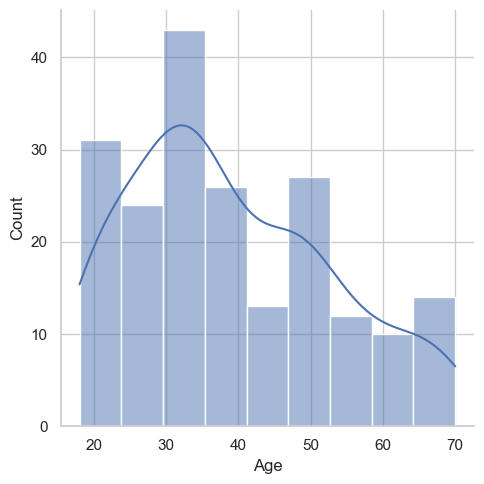

In [113]:
### Distribution of age
sns.displot(x='Age', data=df1, kde=True)

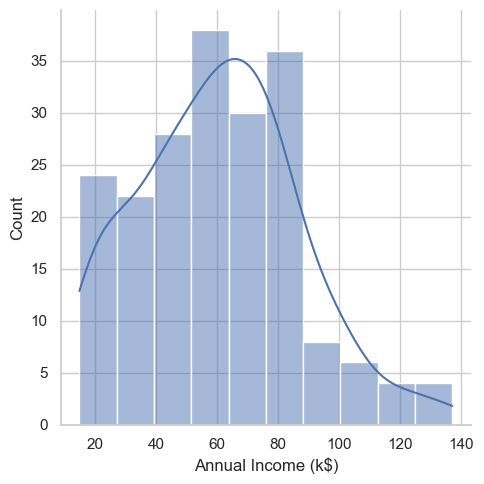

In [138]:
### Distribution of income
sns.displot(x='Annual Income (k$)', data=df1, kde=True)

In [ ]:
### Distribution of score
sns.displot(x='Score', data=df1, kde=True)

In [ ]:
# distribution of categorical variable
print(df1['Gender'].value_counts())
sns.countplot(x='Gender', data=df1)

In [ ]:
df2 = df1.copy()
df2.shape

In [ ]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X = df2.iloc[:, [3,4]].values
X

In [120]:
# Importing the KMeans clustering algorithm from scikit-learn
from sklearn.cluster import KMeans

# List to store the Within-Cluster Sum of Squares (WCSS) values for each number of clusters
wcss = []

# Looping over a range of possible number of clusters (from 1 to 10)
for i in range(1, 11):
    # Creating a KMeans object with 'i' clusters, using the k-means++ initialization method, and setting a random state for reproducibility
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    
    # Fitting the KMeans model to the dataset 'X' (assumed to be predefined)
    kmeans.fit(X)
    
    # Appending the inertia (WCSS value) of the current model to the list
    # Inertia represents the sum of squared distances of samples to their closest cluster center, measuring the compactness of the clusters
    wcss.append(kmeans.inertia_)

# The 'wcss' list now contains the inertia values for 1 to 10 clusters, useful for determining the optimal number of clusters using the elbow method
wcss

[269981.28,
 185917.14253928524,
 106348.37306211119,
 73679.78903948836,
 44448.45544793371,
 38858.9599751439,
 31969.426550235476,
 29858.483597603947,
 22209.851608025547,
 20786.936692059156]

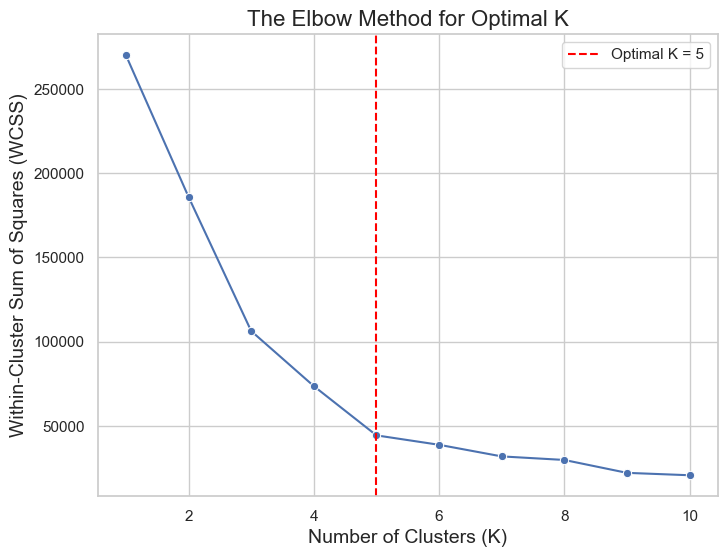

The optimal value of K is: 5


In [121]:
# Visualizing the Elbow method using Seaborn
sns.set(style="whitegrid")  # Setting a style for the seaborn plot
plt.figure(figsize=(8,6))  # Setting the figure size

# Plot the WCSS values
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='b')

# Adding titles and labels
plt.title('The Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14)

# Adding a vertical line to indicate the optimal value of K (5)
plt.axvline(x=5, color='red', linestyle='--', label='Optimal K = 5')

# Show the plot with the optimal K value marked
plt.legend()
plt.show()

# Print the optimal K value
optimal_k = 5
print(f"The optimal value of K is: {optimal_k}")

In [123]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Step 1: Model Initialization
# We initialize the KMeans model with 5 clusters as we determined the optimal K to be 5
# 'init' parameter is set to 'k-means++' for smart initialization of centroids to speed up convergence
# 'random_state' ensures reproducibility of the results across different runs
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Step 2: Fitting the model and predicting the clusters
# The fit_predict() method is a combination of two actions:
#   a) It fits the KMeans model to the input data (X)
#   b) It assigns each data point in X to one of the 5 clusters by predicting the cluster labels
# 'X' is the dataset we are working with, which contains the features for clustering
y_kmeans = kmeans_model.fit_predict(X)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

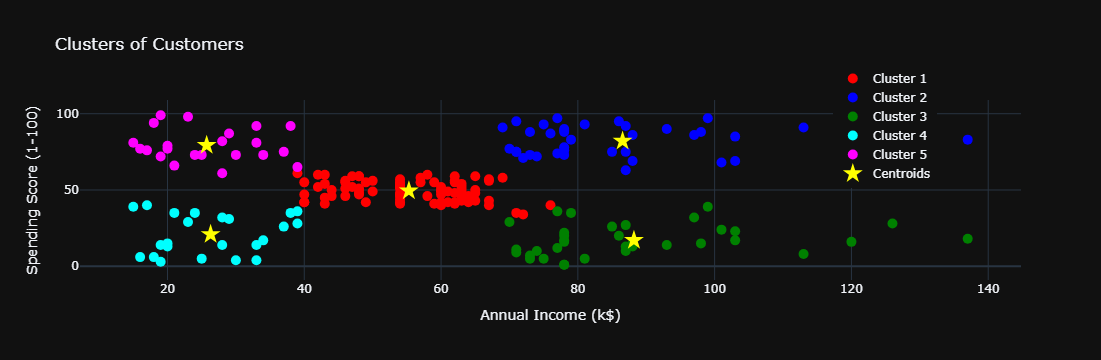

In [132]:
import plotly.graph_objects as go

# Creating a scatter plot for each cluster using Plotly
fig = go.Figure()

# Add Cluster 1
fig.add_trace(go.Scatter(
    x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Cluster 1'
))

# Add Cluster 2
fig.add_trace(go.Scatter(
    x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1],
    mode='markers',
    marker=dict(size=10, color='blue'),
    name='Cluster 2'
))

# Add Cluster 3
fig.add_trace(go.Scatter(
    x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1],
    mode='markers',
    marker=dict(size=10, color='green'),
    name='Cluster 3'
))

# Add Cluster 4
fig.add_trace(go.Scatter(
    x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1],
    mode='markers',
    marker=dict(size=10, color='cyan'),
    name='Cluster 4'
))

# Add Cluster 5
fig.add_trace(go.Scatter(
    x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1],
    mode='markers',
    marker=dict(size=10, color='magenta'),
    name='Cluster 5'
))

# Add Centroids
fig.add_trace(go.Scatter(
    x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1],
    mode='markers',
    marker=dict(size=15, color='yellow', symbol='star'),
    name='Centroids'
))

# Customize layout
fig.update_layout(
    title="Clusters of Customers",
    xaxis_title="Annual Income (k$)",
    yaxis_title="Spending Score (1-100)",
    legend=dict(x=0.8, y=1.2),
    template='plotly_dark'
)

# Show the plot
fig.show()

##### <center> Made with ❤️ by Zahid Salim Shaikh</center>